In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

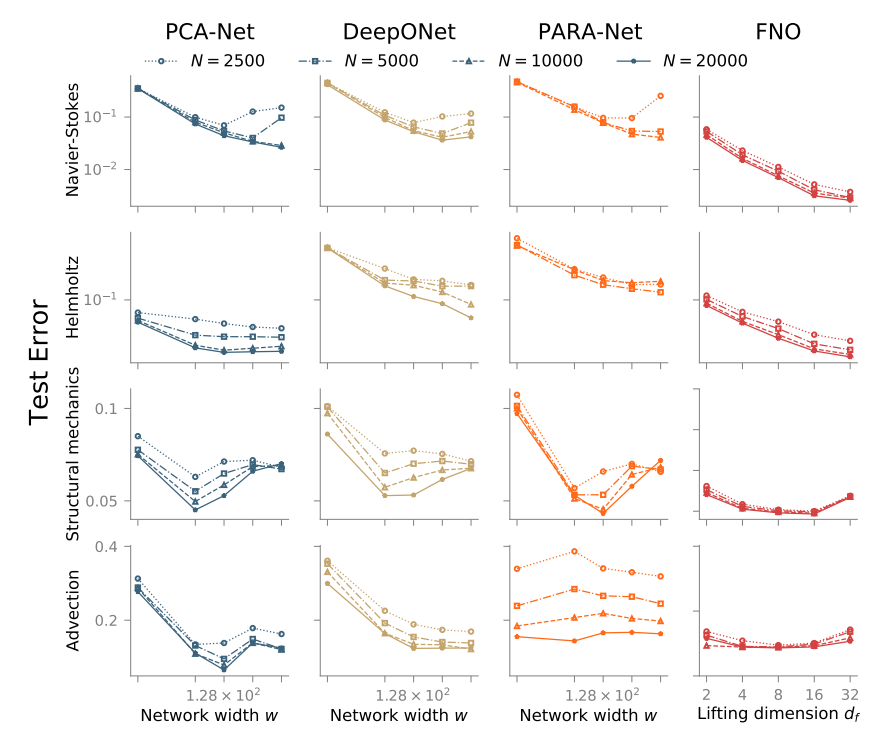

In [2]:
import pandas as pd

In [3]:
#https://www.textfixer.com/tools/remove-line-breaks.php

In [4]:
PCANet = pd.read_csv("data/PCA_Helmhotz.csv", header = None).to_numpy()
DeepONet = pd.read_csv("data/DeepONet_Helmhotz.csv", header = None).to_numpy()
Para = pd.read_csv("data/PARA_Helmhotz.csv", header = None).to_numpy()
FNO = pd.read_csv("data/FNO_Helmhotz.csv", header = None).to_numpy()

In [5]:
np.min(PCANet[:,4]), np.min(FNO[:,4]), np.min(DeepONet[:, 4]), np.min(Para[:, 4])

(0.0212805129491732,
 0.0186432371877133,
 0.0588281889227716,
 0.1254281162561009)

In [6]:
#The columns = [Nexamples, network width, Train, Test]

Text(0, 0.5, 'Test accuracy')

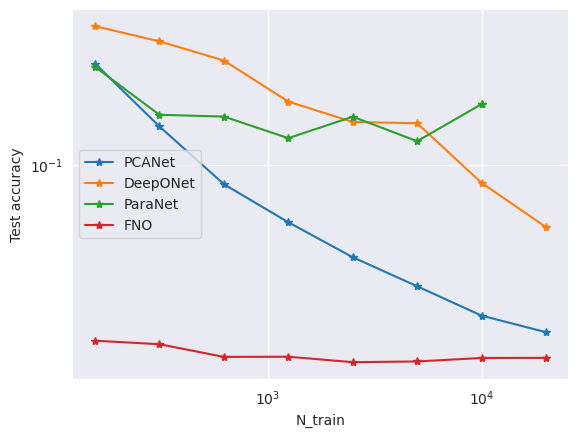

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3],'-*', label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_train')
plt.ylabel('Test accuracy')

In [8]:
Inputs = np.load('data/Helmholtz_inputs.npy')
Outputs = np.load('data/Helmholtz_outputs.npy')

In [9]:
Inputs = Inputs.transpose((2,1,0))
Outputs = Outputs.transpose((2,1,0))

Inputs_fl = Inputs.reshape(len(Inputs), 101*101)
Outputs_fl = Outputs.reshape(len(Outputs), 101*101)

In [10]:
Inputs.shape

(40000, 101, 101)

Linear regression

In [11]:
results = []
for Ntrain in [10000, 20000]:
    for N_components in [64, 128, 256, 512, 1024]:
        print(Ntrain, N_components)
        Ytr = Outputs_fl[:Ntrain]
        Xtr = Inputs_fl[:Ntrain]
        pca = PCA(n_components=min(N_components,Ntrain))
        Xtr = pca.fit_transform(Xtr)
        reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
        #Ypred Ypredtr = reg.predict(Xtr)
        Ypredtr = reg.predict(Xtr)
        train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
        Xtest = Inputs_fl[20000:]
        Ytest = Outputs_fl[20000:]
        Xtest = pca.transform(Xtest)
        Ypred = reg.predict(Xtest)
        test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
        print(train_error, test_error)
        results.append([Ntrain, N_components, train_error, test_error])

results = np.array(results)

10000 64
0.1095300560309573 0.11017149099901781
10000 128
0.10544577445015729 0.10701943003650728
10000 256
0.10531435054382043 0.1084980285924085
10000 512
0.10501040916742595 0.11142897800576086
10000 1024
0.1037866576164675 0.11728828572510601
20000 64
0.10851880093359105 0.10945651434020642
20000 128
0.10445041017509041 0.10592471881280575
20000 256
0.10438888149767604 0.1066908297221642
20000 512
0.10430666263922181 0.10797045512803254
20000 1024
0.10386063959444353 0.11076799333433505


Text(0, 0.5, 'Test accuracy')

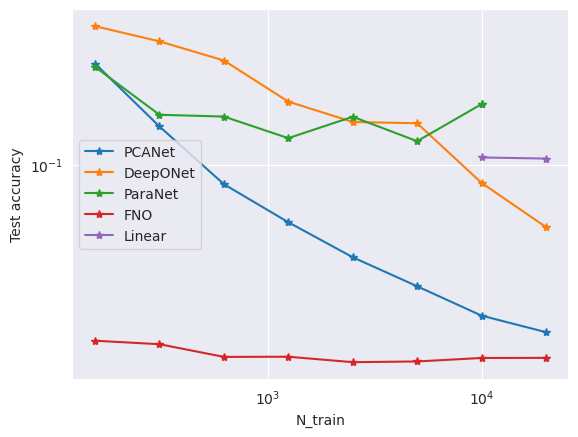

In [12]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3], '-*', label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.plot(results[results[:,1] == 128][:,0], results[results[:,1] == 128][:, 3],'-*', label = 'Linear')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_train')
plt.ylabel('Test accuracy')

In [13]:
resultspca = []
for Ntrain in [20000]:
    for N_components in [8,16, 32, 64, 128, 256]:
        print(Ntrain)
        Ytr = Outputs_fl[:Ntrain]
        Xtr = Inputs_fl[:Ntrain]
        pca = PCA(n_components=N_components)
        Xtr = pca.fit_transform(Xtr)
        reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
        #Ypred Ypredtr = reg.predict(Xtr)
        Ypredtr = reg.predict(Xtr)
        train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
        Xtest = Inputs_fl[20000:]
        Ytest = Outputs_fl[20000:]
        Xtest = pca.transform(Xtest)
        Ypred = reg.predict(Xtest)
        test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
        resultspca.append([N_components, test_error])
#results = np.array(results)

20000
20000
20000
20000
20000
20000


In [14]:
resultspca

[[8, 0.14960297462671757],
 [16, 0.13260202963830026],
 [32, 0.1140852985756796],
 [64, 0.10946473627559893],
 [128, 0.10592485656461126],
 [256, 0.10669036765776628]]

In [15]:
m = 101*101
n = 101*101

def cplx(p):
    return min(2*m*n, (2*p-1)*n + (2*m-1)*p + m)

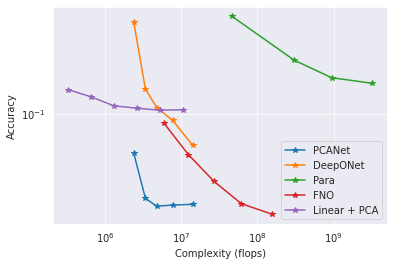

In [18]:
plt.xlabel('Complexity (flops)')
plt.ylabel('Accuracy')
plt.plot(PCANet[PCANet[:,0] == 20000][:,2], PCANet[PCANet[:,0] == 20000][:, 4], '-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,0] == 20000][:,2], DeepONet[DeepONet[:,0] == 20000][:, 4], '-*', label = 'DeepONet')
plt.plot(Para[Para[:,0] == 10000][:4,2], Para[Para[:,0] == 10000][:4, 4], '-*', label = 'Para')
plt.plot(FNO[FNO[:,0] == 20000][:,2], FNO[FNO[:,0] == 20000][:, 4], '-*', label = 'FNO')
#plt.scatter([cplx(128)], [results[:, 2][-1]], marker = 'x', s = 50, color = 'black', label = 'Linear (no PCA)')
plt.plot([cplx(i) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-*', label = 'Linear + PCA')
plt.legend()
plt.xscale('log')
plt.yscale('log')

GPR

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

kernel = Matern(nu = 2.5)

Xtr.shape

resultsgp = []
for Ntrain in [156, 312, 624, 1250, 2500]:
    print(Ntrain)
    Ytr = Outputs_fl[:Ntrain]
    Xtr = Inputs_fl[:Ntrain]
    pca = PCA(n_components=128)
    Xtr = pca.fit_transform(Xtr)
    
    model = GaussianProcessRegressor(kernel, alpha = 1e-10)
    model.fit(Xtr, Ytr)
    #Ypred Ypredtr = reg.predict(Xtr)
    Ypredtr = model.predict(Xtr)
    train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
    Xtest = Inputs_fl[20000:]
    Ytest = Outputs_fl[20000:]
    Xtest = pca.transform(Xtest)
    Ypred= model.predict(Xtest)
    test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
    print(train_error, test_error)
    resultsgp.append([Ntrain, train_error, test_error])

In [40]:
resultsgp = np.array(resultsgp)